In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../csv/Ming18Jun67_total_order.csv")
df.tail()

,order_completed_at,unique_order_count
529,2024-06-13,131
530,2024-06-14,136
531,2024-06-15,148
532,2024-06-16,130
533,2024-06-17,114


In [3]:
from darts import TimeSeries
df_ts = TimeSeries.from_dataframe(df,
                                   time_col='order_completed_at',
                                   value_cols=['unique_order_count'])

In [5]:
# import pandas as pd 
# import tensorflow as tf 
# from keras.layers import Input, Dense 
# from keras.models import Model 
# from sklearn.metrics import precision_recall_fscore_support 
# import matplotlib.pyplot as plt 

In [6]:
# Exclude datetime column again 
# data_tensor = tf.convert_to_tensor(data_converted.drop( 
#     'timestamp', axis=1).values, dtype=tf.float32) 
  
# # Define the autoencoder model 
# input_dim = data_converted.shape[1] - 1
# encoding_dim = 10
  
# input_layer = Input(shape=(input_dim,)) 
# encoder = Dense(encoding_dim, activation='relu')(input_layer) 
# decoder = Dense(input_dim, activation='relu')(encoder) 
# autoencoder = Model(inputs=input_layer, outputs=decoder) 
  
# # Compile and fit the model 
# autoencoder.compile(optimizer='adam', loss='mse') 
# autoencoder.fit(data_tensor, data_tensor, epochs=50, 
#                 batch_size=32, shuffle=True) 
  
# # Calculate the reconstruction error for each data point 
# reconstructions = autoencoder.predict(data_tensor) 
# mse = tf.reduce_mean(tf.square(data_tensor - reconstructions), 
#                      axis=1) 
# anomaly_scores = pd.Series(mse.numpy(), name='anomaly_scores') 
# anomaly_scores.index = data_converted.index 

In [28]:
# Function to replace outliers with the mean of the rest of the values
from scipy.stats import zscore
from darts import TimeSeries

def replace_outliers_with_mean(df, column_name):
    # Calculate Z-scores
    z_scores = zscore(df[column_name])
    
    # Identify outliers (using a threshold of 3 for Z-score)
    outliers = np.abs(z_scores) > 3
    
    # Calculate mean of non-outliers
    mean_non_outliers = df.loc[~outliers, column_name].mean()
    
    # Replace outliers with the mean of non-outliers
    df.loc[outliers, column_name] = mean_non_outliers
    
    return df

# Replace outliers in 'gmv' column
df_remove_out = replace_outliers_with_mean(df, 'unique_order_count')
df_remove_out_ts = TimeSeries.from_dataframe(df_remove_out,
                                   time_col='order_completed_at',
                                   value_cols=['unique_order_count'])
# Display the DataFrame
# df[['order_completed_at', 'unique_order_count']][df['date'] == '2024-06-05']

C:\Users\User\AppData\Local\Temp\ipykernel_13676\406405158.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '142.5801526717557' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers, column_name] = mean_non_outliers


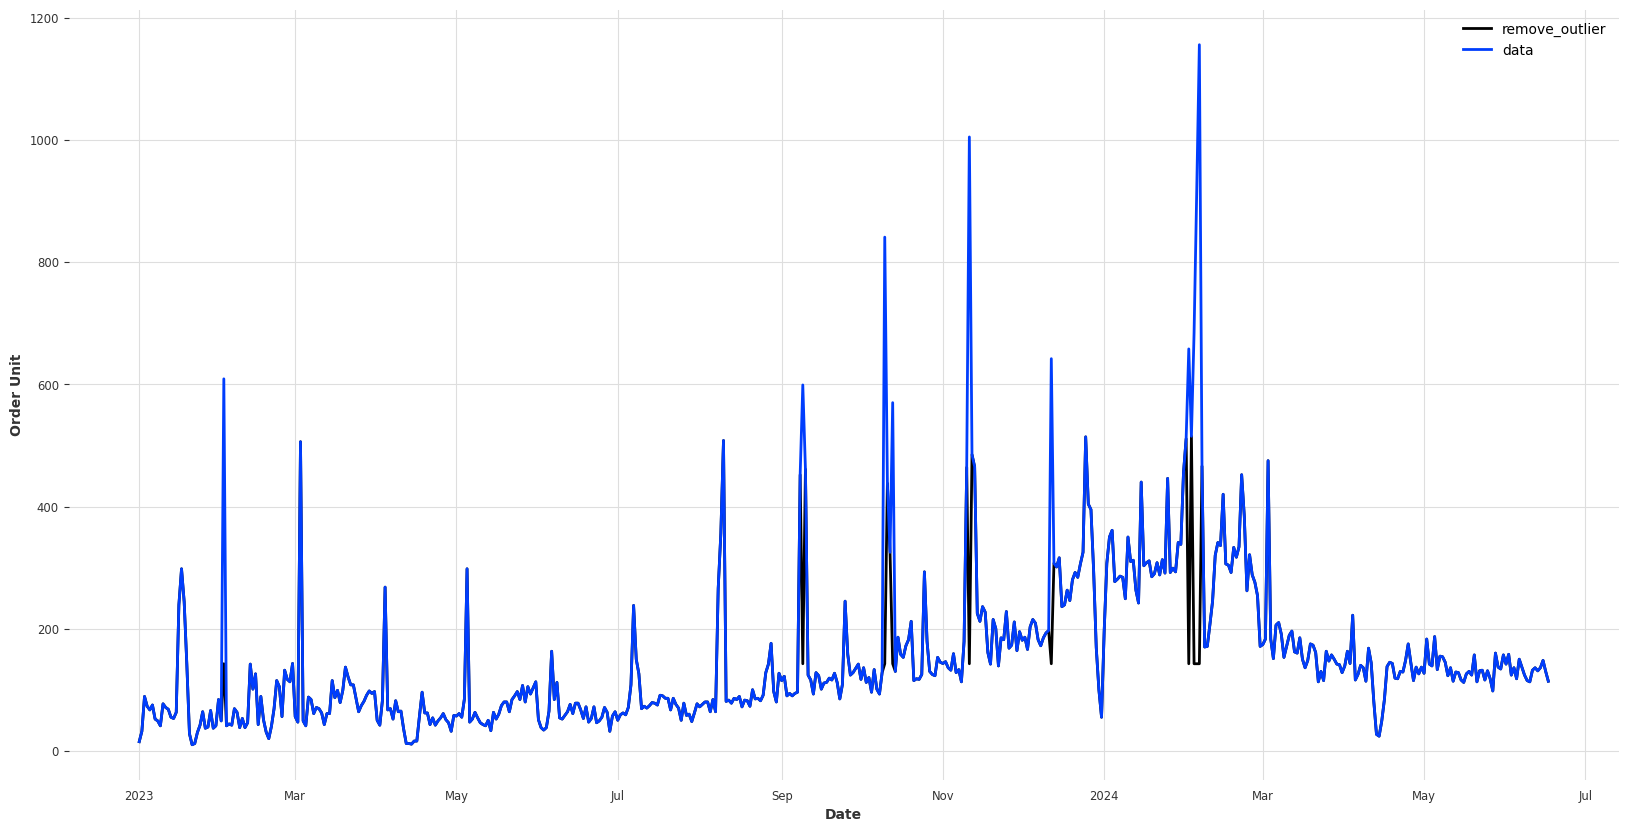

In [32]:
plt.figure(figsize=(20, 10))  # ปรับขนาดของภาพ (กว้าง x สูง)


##prediction
df_remove_out_ts.plot(label="remove_outlier")
df_ts.plot(label="data")

plt.legend()
plt.xlabel('Date')
plt.ylabel('Order Unit')
plt.show()